<a href="https://colab.research.google.com/github/ArshiaSali/Clustering-Techniques/blob/main/ClusteringTechniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering Techniques**

Objective Function:
Given the clinical records of around 300 individuals, the objective is to perform clustering and to find out that group which is in the most risk of having a heart disease.


For this we observe two main contributing factors to Heart Diseases.

  1) Cholesterol Level

  2) Age
  

**Evaluating the Model**

The following metric is used to evaluate the model:

**Silhouette score**. Silhouette score measures how similar the data point is to its own cluster compared to other clusters.




## **Gaussian Mixture Model (GMM) Clustering**

### **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn import metrics

### **Import Dataset**

Link to Dataset : <a href="https://drive.google.com/drive/folders/1G1rauqKLVSSB_V36ufYl4zD2xan6bZuR?usp=sharing"> Dataset</a>

In [2]:
dataset = pd.read_csv('Heart_Disease_Prediction.csv')
x = dataset.iloc[:, [0,4]].values

### **Visualize Data Points Before Clustering**

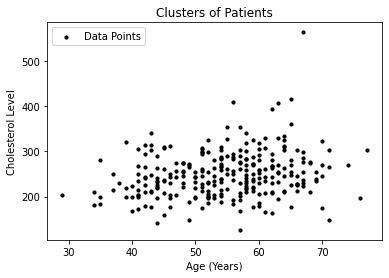

In [3]:
plt.scatter(x[:, 0], x[:, 1], s = 10, c = 'black', label = 'Data Points')
plt.title('Clusters of Patients')
plt.xlabel('Age (Years)')
plt.ylabel('Cholesterol Level')
plt.legend()
plt.show()

### **Calculate Silhoutte Scores**

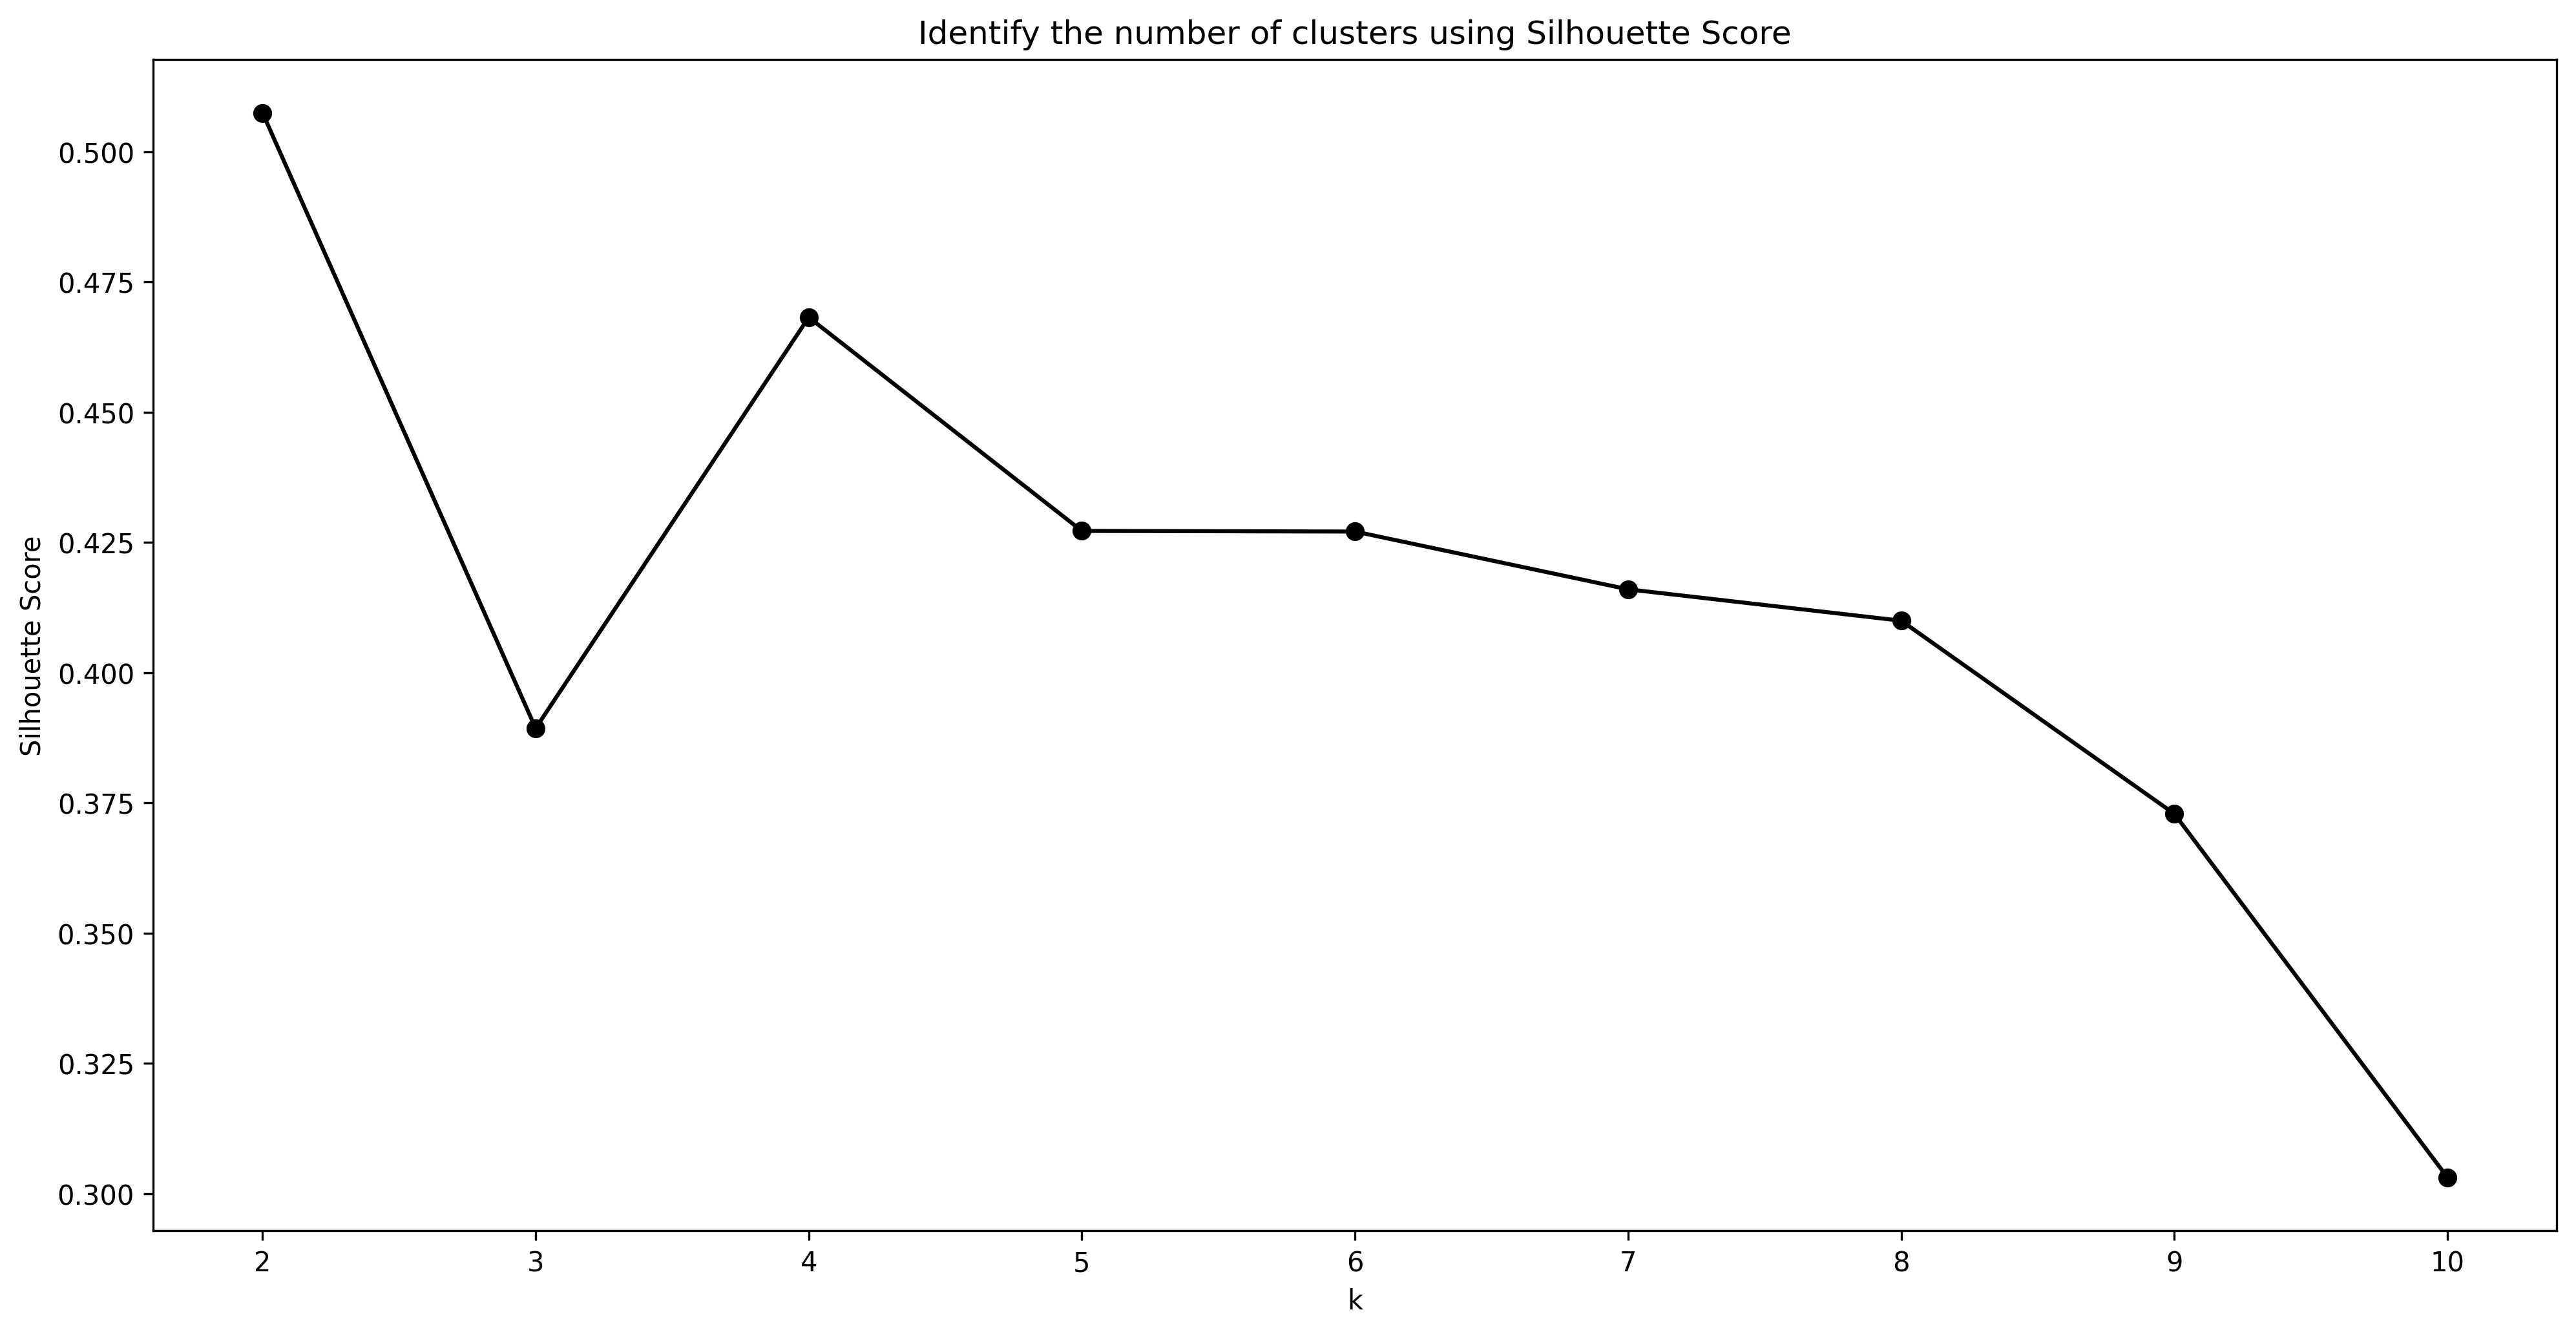

In [4]:
S=[]

K=range(2,11)


for k in K:
    # Set the model and its parameters
    model = GaussianMixture(n_components=k)
    # Fit the model 
    labels = model.fit_predict(x)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(x, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

### **Train the model**

In [5]:
gmm = GaussianMixture(n_components = 4)
gmm.fit(x)

GaussianMixture(n_components=4)

In [6]:
labels = gmm.predict(x)

In [7]:
print(labels)

[2 3 1 1 1 0 1 1 1 2 1 1 0 1 2 0 2 0 0 0 1 1 2 0 1 1 1 2 1 1 1 1 0 2 0 1 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 2 0 2 0 1 0 0 0 1 1 0 2 0 1 1 1 1 2 1 1 1 2 1 0
 1 2 0 0 0 1 1 0 1 0 0 1 0 1 2 1 1 2 1 0 0 1 1 1 2 1 0 1 1 1 1 1 0 1 0 0 2
 0 2 2 2 1 1 1 1 1 0 1 1 2 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0
 1 2 1 0 1 1 1 0 0 2 0 1 0 1 1 1 0 2 1 0 1 1 1 1 1 0 0 1 2 1 1 0 0 2 0 1 1
 2 0 1 2 1 1 0 2 2 1 1 1 0 1 1 1 2 1 2 1 2 2 1 2 0 1 1 0 0 0 0 1 1 1 0 1 1
 0 2 0 0 1 2 1 0 2 0 1 1 1 0 1 0 1 2 1 2 1 1 2 1 1 1 0 1 0 0 2 0 0 1 1 2 2
 1 2 0 1 1 1 0 1 2 0 1]


In [8]:
print('Means: ', gmm.means_)
#print('Covariances: ', clust4.covariances_)
#print('Precisions: ', clust4.precisions_)
#print('Precisions Cholesky: ', clust4.precisions_cholesky_)
# print the converged log-likelihood value
print(gmm.lower_bound_)
print('Converged: ', gmm.converged_)
print(' No. of Iterations: ', gmm.n_iter_)

Means:  [[ 51.01489073 203.94483876]
 [ 57.03128973 252.59302817]
 [ 53.95059674 296.84897115]
 [ 67.         564.        ]]
-8.818204009804425
Converged:  True
 No. of Iterations:  11


### **Visualize the Clusters**

Generalizing E–M: Gaussian Mixture Models A Gaussian mixture model (GMM) attempts to find a mixture of multi-dimensional Gaussian probability distributions that best model any input dataset. In the simplest case, GMMs can be used for finding clusters in the same manner as k-means:

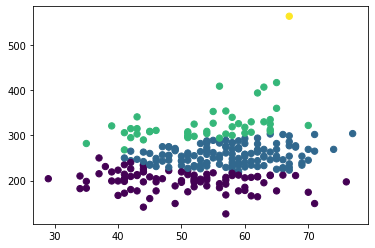

In [9]:
plt.scatter(x[:, 0], x[:, 1], c=labels, s=40, cmap='viridis');

But because GMM contains a probabilistic model under the hood, it is also possible to find probabilistic cluster assignments—in Scikit-Learn this is done using the predict_proba method. This returns a matrix of size [n_samples, n_clusters] which measures the probability that any point belongs to the given cluster:

In [10]:
probs = gmm.predict_proba(x)
print(probs[:5].round(3))

[[0.    0.291 0.709 0.   ]
 [0.    0.    0.    1.   ]
 [0.041 0.787 0.172 0.   ]
 [0.024 0.866 0.11  0.   ]
 [0.011 0.924 0.064 0.   ]]


We can visualize this uncertainty by, for example, making the size of each point proportional to the certainty of its prediction; looking at the following figure, we can see that it is precisely the points at the boundaries between clusters that reflect this uncertainty of cluster assignment:

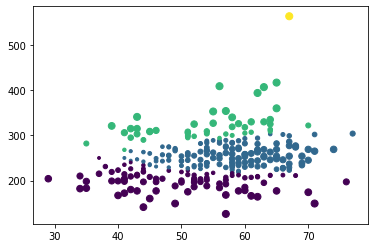

In [11]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', s=size);

### **Inference**
Apart from Outliers, GMM has identified four different clusters for this dataset, with the yellow cluster showing the critical group with high Cholesterol. The critical age group is identified as 55-65 years.

## **Clustering with KMeans**

### **Using the elbow method to find the optimal number of clusters**

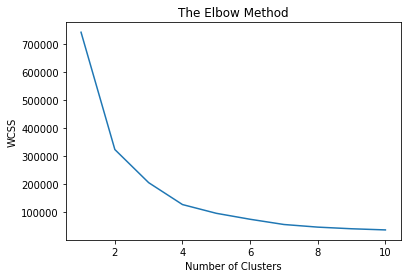

In [12]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### **Train the K-Means model on the dataset**

In [13]:
kmeans_scikit = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans_scikit = kmeans_scikit.fit_predict(x)

### **Visualising the clusters**

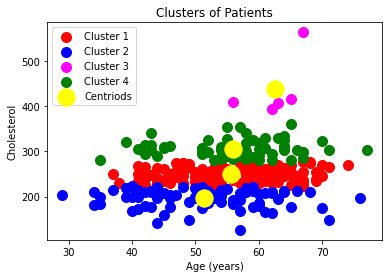

In [14]:
plt.scatter(x[y_kmeans_scikit == 0, 0], x[y_kmeans_scikit == 0, 1], s  = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans_scikit == 1, 0], x[y_kmeans_scikit == 1, 1], s  = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans_scikit == 2, 0], x[y_kmeans_scikit == 2, 1], s  = 100, c = 'magenta', label = 'Cluster 3')
plt.scatter(x[y_kmeans_scikit == 3, 0], x[y_kmeans_scikit == 3, 1], s  = 100, c = 'green', label = 'Cluster 4')
plt.scatter(kmeans_scikit.cluster_centers_[:, 0], kmeans_scikit.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centriods')
plt.title('Clusters of Patients')
plt.xlabel('Age (years)')
plt.ylabel('Cholesterol')
plt.legend()
plt.show()

### **Inference**
KMeans has identified four different clusters for this dataset, with the pink cluster showing the critical group with high Cholesterol.

The critical age group is identified as 55-65 years.




## **Hierarchical Clustering (Agglomerative)**



### **Using the dendrogram to find the optimal number of clusters**

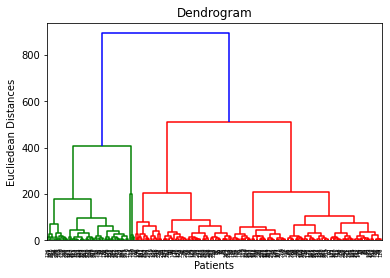

In [15]:
import scipy.cluster.hierarchy as sch 
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Patients')
plt.ylabel('Eucliedean Distances')
plt.show()

### **Training the Hierarchical Clustering model on the dataset**

In [16]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

In [17]:
print(y_hc)

[3 1 0 0 0 2 0 0 3 1 0 0 0 0 3 2 3 2 2 2 0 0 3 2 3 0 0 3 0 0 0 0 2 3 2 0 2
 0 2 0 0 2 0 2 2 2 2 2 0 0 3 2 1 2 0 2 2 2 0 3 2 3 0 0 0 0 0 3 0 0 0 3 0 2
 0 3 2 2 2 0 2 2 0 2 2 0 2 0 3 0 2 3 0 2 2 0 3 0 3 0 2 0 0 3 0 0 0 0 2 2 3
 0 3 3 3 0 0 3 0 3 2 3 0 3 0 2 0 2 2 0 0 2 0 0 0 2 3 0 2 2 2 0 0 2 3 3 0 2
 2 0 0 0 0 3 0 2 2 3 2 0 0 0 0 0 2 3 0 2 0 3 0 0 3 2 2 3 3 0 0 2 0 1 2 0 0
 3 2 0 1 0 0 2 3 3 0 0 0 2 0 3 3 3 0 3 3 3 3 0 3 0 3 0 2 2 2 2 0 0 0 0 0 0
 2 3 2 2 0 3 3 2 3 0 0 0 0 2 0 2 0 3 3 3 0 0 3 0 0 0 2 3 2 0 3 2 2 3 0 3 3
 0 3 2 3 0 0 2 0 3 2 3]


### **Visualising the clusters**

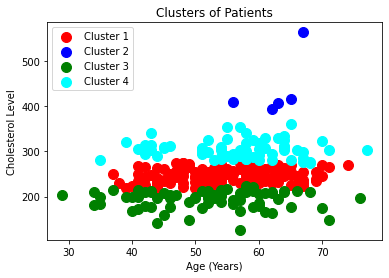

In [18]:
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of Patients')
plt.xlabel('Age (Years)')
plt.ylabel('Cholesterol Level')
plt.legend()
plt.show()

### **Inference**
Agglomerative Clustering has identified four different clusters for this dataset, with the blue cluster showing the critical group with high Cholesterol.

The critical age group is identified as 55-65 years.

## **DBSCAN Algorithm**

### **Import Libraries**

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
  
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [20]:
x = dataset[['Age', 'Cholesterol']]

In [21]:
scaler = MinMaxScaler()

# fit_transform
scaled_data = scaler.fit_transform(x)
scaled_data.shape

(270, 2)

### **Training the DBSCAN Clustering model on the dataset**

In [22]:
model=DBSCAN(eps=0.04,min_samples=10).fit(scaled_data)
print(model.labels_)

[-1 -1  2 -1 -1 -1 -1  0 -1 -1  0 -1 -1 -1  2 -1 -1  1 -1 -1 -1 -1 -1 -1
  3 -1 -1 -1  0 -1  0 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1  0  0 -1 -1
 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1  0 -1  2 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  2 -1 -1 -1 -1  2 -1 -1  0 -1  3  1  1 -1
 -1  0 -1 -1 -1 -1 -1  2 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1  2
 -1  3  2 -1  3  1 -1  1  1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  2 -1 -1
  3  3 -1 -1  0 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1  3  0 -1 -1 -1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  0  1 -1 -1 -1  2  0 -1 -1 -1 -1  0 -1 -1  2 -1 -1  0 -1 -1
 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1  2  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  3 -1 -1  0 -1 -1 -1  2  1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  0  2 -1
 -1  1 -1  2 -1 -1]


In [23]:
# assign cluster labels
x['cluster_lab'] = model.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda : colors[x % len(colors)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Cholesterol')

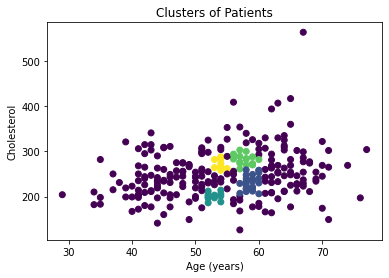

In [24]:
plt.scatter(x['Age'], x['Cholesterol'], c=x['cluster_lab']);
plt.title('Clusters of Patients')
plt.xlabel('Age (years)')
plt.ylabel('Cholesterol')

### **Inference**
Apart from Outliers, DBSCAN has identified four different clusters for this dataset, with the green cluster showing the critical group with high Cholesterol.

This aligns with the other clustering results as well. 

The critical age group is identified as 55-65 years.

## **Comparison of Clustering Techniques**

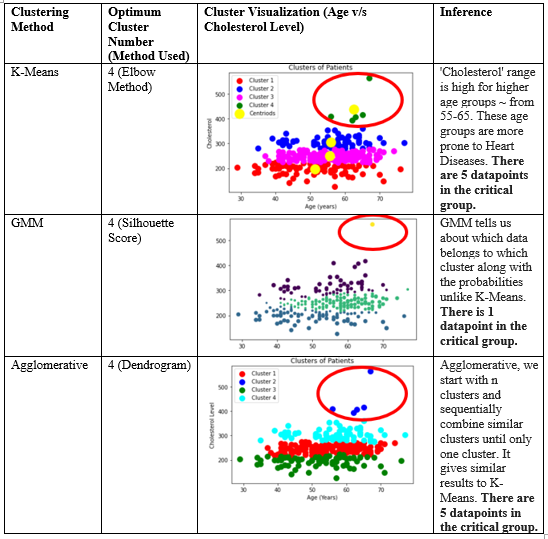





In [25]:
dataset.query('Age>57 & Age<67 & Cholesterol<178')

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
56,61,1,4,138,166,0,2,125,1,3.6,2,1,3,Presence
108,59,1,4,140,177,0,0,162,1,0.0,1,1,7,Presence
235,62,0,4,160,164,0,2,145,0,6.2,3,3,7,Presence


### **Inference**

Cholesterol can be a major contributing factor to various Heart Diseases. High Cholesterol levels (~400) can be found in age groups in the range 57 - 67 years. The plot helps us to understand which age groups are affected more with their lifestyles. Hospitals can send out Monthly checkup notifications to these age groups and can suggest diet plans to individuals in and around this range.

### **Action Measure**

FBS (Fasting Blood Sugar) is found to be less in individuals having low Cholesterol in the same Age Group. Individuals should also watch on their Diabetes Level as well. Maintaining low Blood Sugar Level may also help in leading a healthy life along with Balanced Diet and Regular Exercises.